EULER METHOD DETAILS
step    t_n        y_n   f(t_n,y_n)      Δy=f*dt    y_{n+1}
   0   0.00     1.0000      -2.0000      -0.6000     0.4000
   1   0.30     0.4000      -0.8000      -0.2400     0.1600
   2   0.60     0.1600      -0.3200      -0.0960     0.0640
   3   0.90     0.0640      -0.1280      -0.0384     0.0256
   4   1.20     0.0256      -0.0512      -0.0154     0.0102
   5   1.50     0.0102      -0.0205      -0.0061     0.0041
   6   1.80     0.0041      -0.0082      -0.0025     0.0016
   7   2.10     0.0016      -0.0033      -0.0010     0.0007
   8   2.40     0.0007      -0.0013      -0.0004     0.0003
   9   2.70     0.0003      -0.0005      -0.0002     0.0001


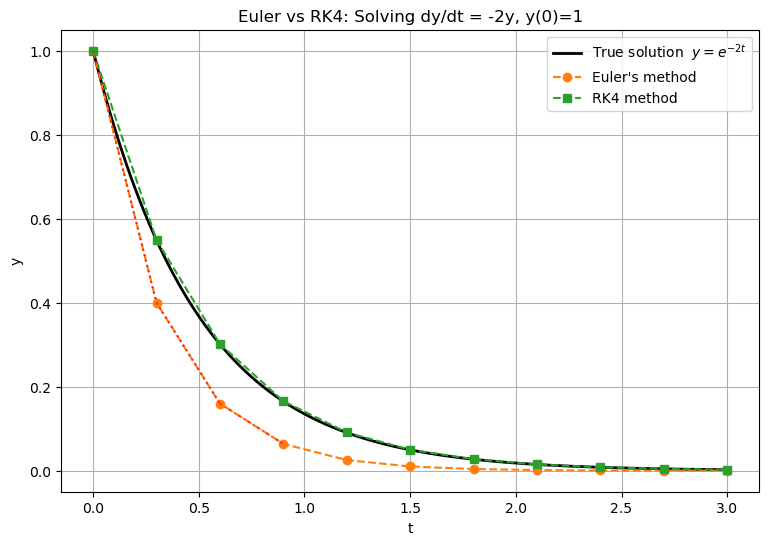

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# Example ODE: dy/dt = -2y,   y(0) = 1
# True solution: y(t) = e^(-2t)
# ==========================================================

def f(t, y):
    """Derivative function f(t, y) = dy/dt."""
    return -2 * y

# Simulation parameters
t0, tf = 0, 3
dt = 0.3
N = int((tf - t0) / dt)
t_vals = np.linspace(t0, tf, N + 1)

# ----------------------------------------------------------
# EULER'S METHOD
# ----------------------------------------------------------
y_euler = np.zeros(N + 1)
y_euler[0] = 1.0  # initial condition

print("EULER METHOD DETAILS")
print(f"{'step':>4} {'t_n':>6} {'y_n':>10} {'f(t_n,y_n)':>12} {'Δy=f*dt':>12} {'y_{n+1}':>10}")
for n in range(N):
    slope = f(t_vals[n], y_euler[n])
    delta_y = slope * dt
    y_euler[n + 1] = y_euler[n] + delta_y
    print(f"{n:4d} {t_vals[n]:6.2f} {y_euler[n]:10.4f} {slope:12.4f} {delta_y:12.4f} {y_euler[n+1]:10.4f}")

# ----------------------------------------------------------
# RUNGE–KUTTA 4TH ORDER METHOD (RK4)
# ----------------------------------------------------------
y_rk4 = np.zeros(N + 1)
y_rk4[0] = 1.0

for n in range(N):
    t, y = t_vals[n], y_rk4[n]
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt*k1/2)
    k3 = f(t + dt/2, y + dt*k2/2)
    k4 = f(t + dt, y + dt*k3)
    y_rk4[n + 1] = y + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# ----------------------------------------------------------
# TRUE SOLUTION
# ----------------------------------------------------------
t_true = np.linspace(t0, tf, 300)
y_true = np.exp(-2 * t_true)

# ----------------------------------------------------------
# PLOT RESULTS
# ----------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(t_true, y_true, 'k-', lw=2, label='True solution  $y=e^{-2t}$')
plt.plot(t_vals, y_euler, 'o--', color='C1', label="Euler's method")
plt.plot(t_vals, y_rk4, 's--', color='C2', label='RK4 method')

# Show tangent lines for first few Euler steps
for n in range(3):
    t_n, y_n = t_vals[n], y_euler[n]
    slope = f(t_n, y_n)
    t_line = np.linspace(t_n, t_n + dt, 20)
    y_line = y_n + slope*(t_line - t_n)
    plt.plot(t_line, y_line, 'r:', alpha=0.7)

plt.title("Euler vs RK4: Solving dy/dt = -2y, y(0)=1")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()